##Descripció

Familiaritza't amb la Programació Numèrica a través de la llibreria NumPy.


#Nivell 1


##Exercici 1

Crea una funció que donat un Array d’una dimensió, et faci un resum estadístic bàsic de les dades. Si detecta que l’array té més d’una dimensió, ha de mostrar un missatge d’error.



In [1]:
import numpy as np

In [2]:
def basicstats(a):
    '''
    Compute several descriptive statistics of the passed 1D array.
    '''
    if a.ndim != 1:
        print("Error, the array contains {} dimension/s\n".format(a.ndim))
    else:
        print("Nobs={}\nMin={}\nMax={}\nRange={}\nMean={}\nMedian={}\nStandard deviation={}\nVariance={}\n"\
              .format(a.size, np.amin(a), np.amax(a), np.ptp(a), np.mean(a), \
                      np.median(a),np.std(a) ,np.var(a)))

In [3]:
a = np.array([1, 2, 2, 4, 5])
basicstats(a)

b = np.array([[1, 2, 2, 4, 5],[1, 2, 2, 4, 5]])
basicstats(b)

c = np.array(42)
basicstats(c)

Nobs=5
Min=1
Max=5
Range=4
Mean=2.8
Median=2.0
Standard deviation=1.469693845669907
Variance=2.16

Error, the array contains 2 dimension/s

Error, the array contains 0 dimension/s



##Exercici 2

Crea una funció que et generi un quadrat NxN de nombres aleatoris entre el 0 i el 100.



In [4]:
def rnd(n):
    '''
    Generate a N x N array of ints between 0 and 100, inclusive.
    '''
    return np.random.randint(low=0, high=100, size=(n, n), dtype=int)

rnd(3)

array([[22, 94, 25],
       [93,  2, 11],
       [99, 46, 61]])

##Exercici 3

Crea una funció que donada una taula de dues dimensions, et calculi els totals per fila i els totals per columna.



In [5]:
def sumall(n):
    '''
    Sum of array elements over both axis.
    '''
    row = np.sum(n, axis=1)
    col = np.sum(n, axis=0)
    print("Row total={}\nColumn total={}\n".format(row,col))

sumall([[0, 1], [0, 5]])


Row total=[1 5]
Column total=[0 6]



##Exercici 4

Implementa manualment una funció que calculi el coeficient de correlació. Informa’t-en sobre els seus usos i interpretació.

**Pearson's correlation coefficient** is a measure of linear dependence between two **quantitative random variables**. 

In a less formal way, we can define Pearson's correlation coefficient as an index that can be used to measure the degree of relationship of two variables as long as they are both quantitative and continuous.

The formula return a value between -1 and 1, where:



*   1 indicates a strong positive relationship.
*   -1 indicates a strong negative relationship.
*   A result of zero indicates no relationship at all.





### Manual implementation



#### 1- Arithmetic mean

$$\mu = \frac {\sum_{i=1}^N x_i }{N}$$

In [10]:
x = np.array([1, 2, 3, 4, 5])
y = np.array([1, 2, 3, 4, 5])

In [11]:
N = len(x)
#Arithmetic mean
xm = sum(x)/N
ym = sum(y)/N
print(xm)
print(ym)

3.0
3.0


#### 2- Variance

Population variance

$$\sigma_{N}^2 = \frac {\sum_{i=1}^N (x - \bar{x})^2}{N}$$

Sample variance

$$S_{N}^2 = \frac {\sum_{i=1}^n (x - \bar{x})^2}{N-1}$$

In [12]:
#Variance
s2x = (sum((x - xm)**2))/N
s2y = (sum((y - ym)**2))/N
print(s2x)
print(s2y)

2.0
2.0


#### 3- Standard deviation 

Population standard deviation:

$$\sigma_{N} = \sqrt\frac {\sum_{i=1}^N (x - \bar{x})^2}{N}$$

Sample standard deviation:

$$S_{N} = \sqrt \frac {\sum_{i=1}^n (x - \bar{x})^2}{N-1}$$

In [13]:
#Standard deviation
sx = ((sum((x - xm)**2))/N)**(1/2)
sy = ((sum((y - ym)**2))/N)**(1/2)
print(sx)
print(sy)

1.4142135623730951
1.4142135623730951


#### 4- Covariance

$$\sigma_{xy} = \frac {\sum_{i=1}^N x_i y_i }{N} - \bar{x} \cdot \bar{y}$$

In [14]:
#Covariance
sxy = (sum(x * y) / N) - (xm * ym)
print(sxy)

2.0


#### 5- Correlation Coefficient

$$\rho_{xy} = \frac {\sigma_{xy}}{\sigma_{x} \cdot \sigma_{y}} = \frac {Cov(xy)} {\sqrt {Var(x) \cdot Var(y)}}$$

In [15]:
#Correlation Coefficient
rxy = sxy / (sx * sy)
print(rxy)

0.9999999999999998


### Function

In [17]:
def corr_coef(x, y):
    """
    Function that calculates the correlation coefficient of two lists
    """
    import numpy as np
    #convert to numpy array
    x = np.array(x)
    y = np.array(y)

    #Tamaño
    N = len(x)

    #Media aritmética
    xm = sum(x)/N
    ym = sum(y)/N

    #desviación estándar 
    sx = ((sum((x - xm)**2))/N)**(1/2)
    sy = ((sum((y - ym)**2))/N)**(1/2)

    #Covarianza
    sxy = (sum(x * y) / N) - (xm * ym)

    #Coeficiente de correlación
    rxy = sxy / (sx * sy)

    return rxy

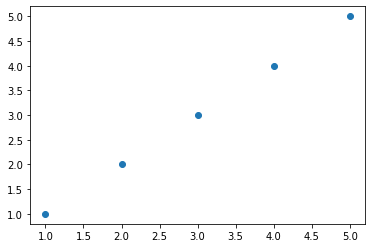

0.9999999999999998

In [18]:
from matplotlib import pyplot
x = [1, 2, 3, 4, 5]
y = [1, 2, 3, 4, 5]

# plot
pyplot.scatter(x, y)
pyplot.show()

corr_coef(x, y)

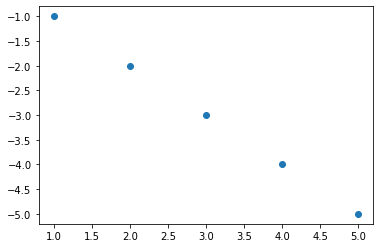

-0.9999999999999998

In [19]:
x = [1, 2, 3, 4, 5]
y = [-1, -2, -3, -4, -5]

# plot
pyplot.scatter(x, y)
pyplot.show()

corr_coef(x, y)

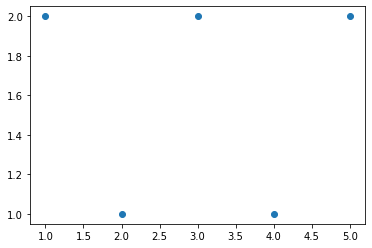

-1.2819751242557092e-15

In [20]:
x = [1, 2, 3, 4, 5]
y = [2, 1, 2, 1, 2]

# plot
pyplot.scatter(x, y)
pyplot.show()

corr_coef(x, y)